In [45]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import math
#import sys
#!{sys.executable} -m pip install networkx
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter
%matplotlib notebook

In [24]:
N = 4096
tstop = 25 # collapse time
dtime = 0.1 # integration time
dtout = 1 # step output time
epsilon = 0.03

#n_outputs = math.floor(tstop / dtout)
#n_outputs = 52
#print(n_outputs)

# brute force 
n_outputs = 0

with open("treecode_out.txt", "r") as file:
    for line in file:
        if line.strip() == str(N):
            n_outputs += 1
            
print(n_outputs) 

146


In [49]:
# Reading masses from the output


data_time = np.empty(n_outputs)
with open("treecode_out.txt", "r") as file:
    index = 0
    for _ in range(n_outputs):
        for i in range(2):
            file.readline()
        
        data_iter_t = np.genfromtxt(file, max_rows=1)
        data_time[index] = data_iter_t
        index += 1
        
        for _ in range(3*N):
            file.readline()
            
data_mass = np.empty(N*n_outputs)

with open("treecode_out.txt", "r") as file:
    index = 0
    for _ in range(n_outputs):
        for i in range(3):
            file.readline()
        
        data_iter_m = np.genfromtxt(file, max_rows=N)
        data_mass[index:index+N] = data_iter_m
        index += N
        
        for _ in range(2*N):
            file.readline()

In [52]:
print (data_time)

[ 0.         0.5        1.         1.5        2.         2.5
  3.         3.5        4.         4.5        5.         0.
  0.5        1.         1.5        2.         2.5        3.
  3.5        4.         4.5        5.         0.         0.5
  1.         1.5        2.         2.5        3.         3.5
  4.         4.5        5.         5.5        6.         6.5
  7.         7.5        8.         8.5        9.         9.5
 10.         0.         0.5        1.0000001  1.5000002  2.0000002
  2.4999998  2.9999993  3.4999988  3.9999983  4.4999981  4.9999976
  5.4999971  5.9999967  6.4999962  6.9999957  7.4999952  7.9999948
  8.4999962  8.9999981  9.5       10.000002   0.         0.5
  1.0000001  1.5000002  2.0000002  2.4999998  2.9999993  3.4999988
  3.9999983  4.4999981  4.9999976  5.4999971  5.9999967  6.4999962
  6.9999957  7.4999952  7.9999948  8.4999962  8.9999981  9.5
 10.000002  10.500004  11.000006  11.500008  12.00001   12.500011
 13.000013  13.500015  14.000017  14.500019  15.0000

In [50]:
# Reading coordinates and velocities from the output

data_coordinates = []
data_velocities = []

with open("treecode_out.txt", "r") as file:
    for _ in range(n_outputs):
        for _ in range(3+N):
            file.readline()
            
        data_iter_c = np.genfromtxt(file, usecols = range(0,3), delimiter = '', max_rows=N)
        data_coordinates.append(data_iter_c)
        data_iter_v = np.genfromtxt(file, usecols = range(0,3), delimiter = '', max_rows=N)
        data_velocities.append(data_iter_v)
        
data_coordinates = np.concatenate(data_coordinates)
data_velocities = np.concatenate(data_velocities)

In [51]:
x = np.zeros(shape = len(data_coordinates))
y = np.zeros(shape = len(data_coordinates))
z = np.zeros(shape = len(data_coordinates))

vx = np.zeros(shape = len(data_velocities))
vy = np.zeros(shape = len(data_velocities))
vz = np.zeros(shape = len(data_velocities))

for i in range(len(data_coordinates)):
    x[i] = data_coordinates[i][0]
    y[i] = data_coordinates[i][1]
    z[i] = data_coordinates[i][2]
    
for i in range(len(data_velocities)):
    vx[i] = data_velocities[i][0]
    vy[i] = data_velocities[i][1]
    vz[i] = data_velocities[i][2]

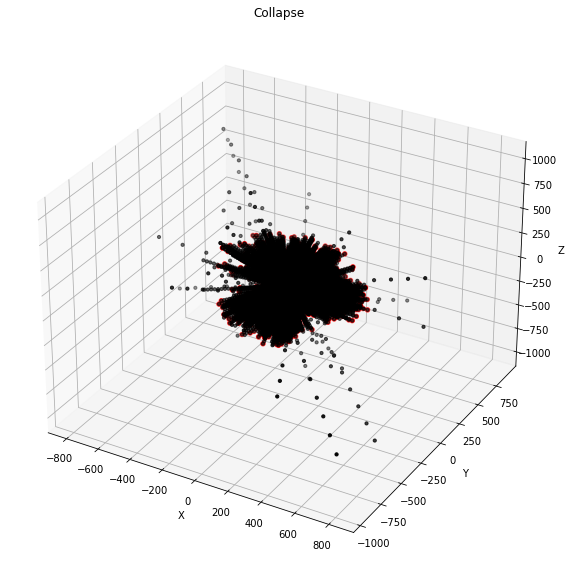

In [31]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
ax.scatter(x, y, z, color='black', s=10)
#ax.scatter(x[:N], y[:N], z[:N], color='blue')
ax.scatter(x[-N:], y[-N:], z[-N:], color='red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Collapse')
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


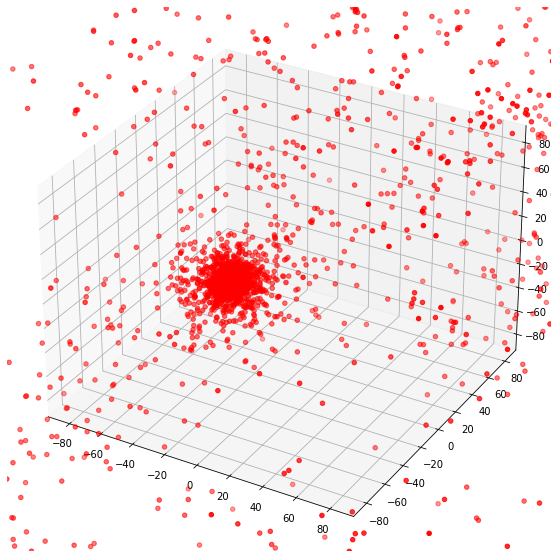

In [29]:
num_frames = len(data_coordinates) // N
#num_frames = n_outputs

def update(frame):
    start_idx = frame * N
    end_idx = (frame + 1) * N
    scat._offsets3d = (x[start_idx:end_idx], y[start_idx:end_idx], z[start_idx:end_idx])
    return scat,

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

scat = ax.scatter(x[:N], y[:N], z[:N], c='r', marker='o')

ax.set_xlim(-90,90)
ax.set_ylim(-90,90)
ax.set_zlim(-90,90)

ani = FuncAnimation(fig, update, frames=num_frames, interval=200)
ani.save('prova1.gif', writer='imagemagick', fps=10)

plt.show()

## I think we have to precompute the timestep

In [30]:
#it should be the minimum separation (??????)




# cose Malvi boh

In [37]:
# write x_evolution, yev, z_ev.......
#matrice con n_bodies righe e la posizione x del relativo bodie sulla colonna
# x[t*N:(1+t)*N] 
time = np.empty(num_frames) # I NEED TO GET TIIIIME

print(x.shape, y.shape, z.shape, num_frames)
x_evolution = np.empty((N, num_frames))
y_evolution = np.empty((N, num_frames))
z_evolution = np.empty((N, num_frames))
v_x_evolution = np.empty((N, num_frames))
v_y_evolution = np.empty((N, num_frames))
v_z_evolution = np.empty((N, num_frames))

t = 0
n = 0
for t in range(num_frames):
    time = 
    
    for n in range(N):
        #print(n)
        x_evolution[n][t] = x[n + t*N]
        y_evolution[n][t] = y[n + t*N]
        z_evolution[n][t] = z[n + t*N]
        v_x_evolution[n][t] = vx[n + t*N]
        v_y_evolution[n][t] = vy[n + t*N]
        v_z_evolution[n][t] = vz[n + t*N]
        
print(x.shape)


(598016,) (598016,) (598016,) 146
(598016,)


<IPython.core.display.Javascript object>


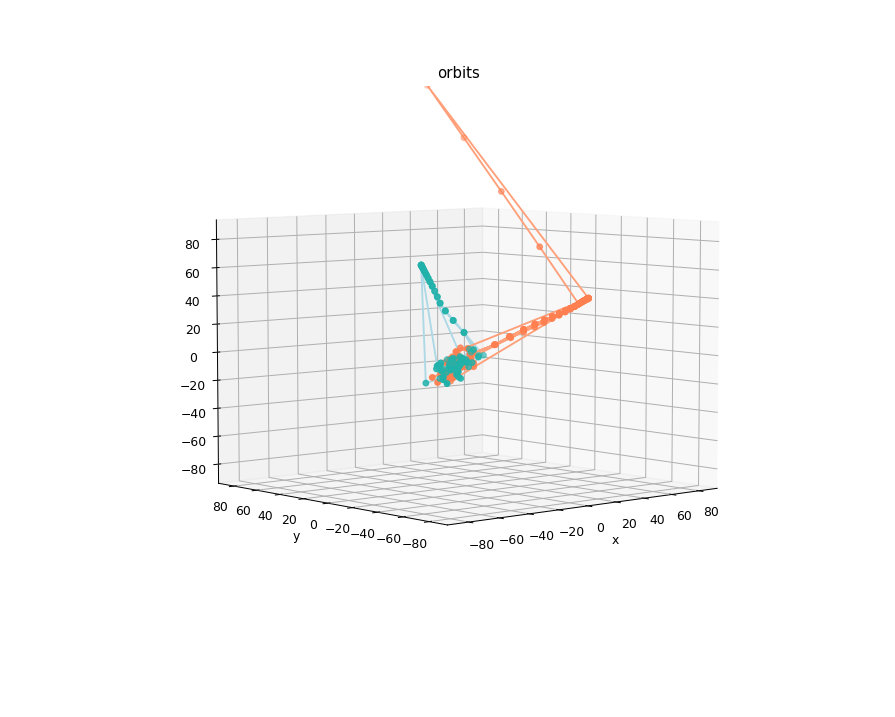

In [46]:
#PLOTTING JUST THE FIRST TWO TO SEE IF IT MAKES SENSE


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

#IF I WANT POINTS:

ax.scatter(x_evolution[0][:],y_evolution[0][:],z_evolution[0][:], color = 'lightseagreen')
ax.scatter(x_evolution[1][:],y_evolution[1][:], z_evolution[1][:], color = 'coral')

#IF I WANT THE PLOT OF THE ORBITS
ax.plot(x_evolution[0], y_evolution[0], z_evolution[0], label='1', color = 'lightblue')
ax.plot(x_evolution[1], y_evolution[1], z_evolution[1], label='2', color = 'lightsalmon')
#plt.plot(x3, y3, label='3', color = 'blue')


ax.set_title('orbits')
ax.set_xlabel('x')
ax.set_ylabel('y')
#plt.gca().set_aspect('equal', adjustable='box')
#ax.grid(True)
#ax.legend()
ax.set_xlim(-90,90)
ax.set_ylim(-90,90)
ax.set_zlim(-90,90)

plt.show()



#MAYBE I SHOULD DO IT IN 3D

<IPython.core.display.Javascript object>


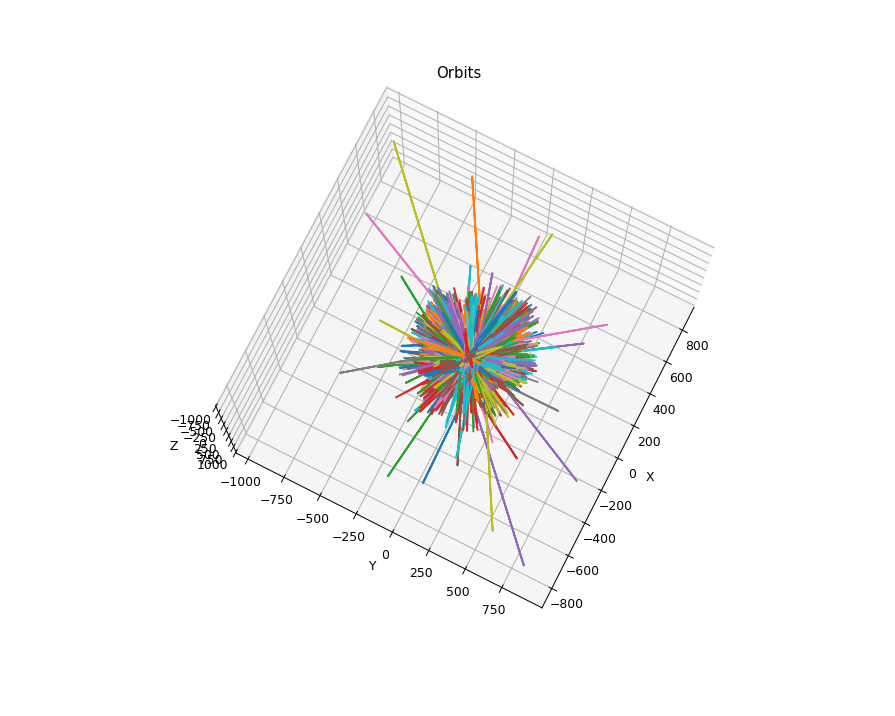

"\nplt.figure(figsize=(10, 8))\n\nfor n in range(n_bodies):\n    #IF I WANT POINTS:\n    #plt.scatter(x[n][:],y[n][:])\n    #IF I WANT THE PLOT OF THE ORBITS\n    plt.plot(x[n], y[n])\n\nplt.title('orbits')\nplt.xlabel('x')\nplt.ylabel('y')\n#plt.gca().set_aspect('equal', adjustable='box')\nplt.grid(True)\n#plt.legend()\nplt.show()\n"

In [47]:
#ALL THE ORBITS


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for orbit_x, orbit_y, orbit_z in zip(x_evolution, y_evolution, z_evolution):
    ax.plot(orbit_x, orbit_y, orbit_z)

ax.set_title('Orbits')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


'''
plt.figure(figsize=(10, 8))

for n in range(n_bodies):
    #IF I WANT POINTS:
    #plt.scatter(x[n][:],y[n][:])
    #IF I WANT THE PLOT OF THE ORBITS
    plt.plot(x[n], y[n])

plt.title('orbits')
plt.xlabel('x')
plt.ylabel('y')
#plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
#plt.legend()
plt.show()
'''

(4096, 146)


<IPython.core.display.Javascript object>


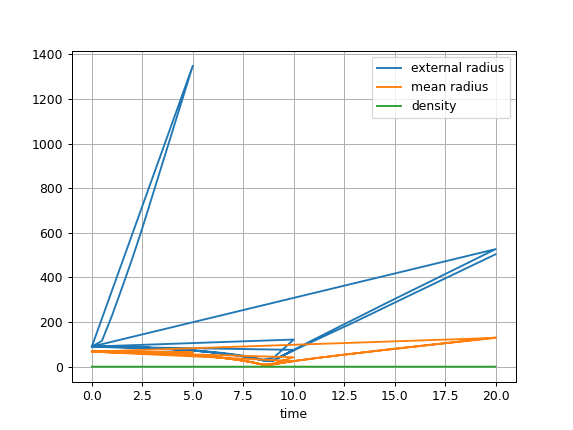

I plotted the density over radii, just to see how it goes, we could do two different plots since they have different units


In [56]:
#I want to do a matrix with the radii of each n particle at each time
#x[0][:] is all the positions of the body 0

#print(x[0][:])
#print((x[0][:])**2)
#print((x**2).shape)
r_evolution = np.empty((N, num_frames))
r_evolution = np.sqrt(x_evolution**2 + y_evolution**2 + z_evolution**2)
print(r_evolution.shape)
#external r for each timelapse.... NON MI CONVINCE TROPPO USARE QUESTO PER LA DENSITÀ... PERCHÈ MI PRENDE LA PARTICELLE CHE SCAPPANO
r_ext = np.max(r_evolution, axis = 0)
r_mean = np.mean(r_evolution, axis = 0)
rho_evolution = N * data_mass[0] / (4/3 * np.pi * (r_ext)**3 )

plt.plot(data_time, r_ext, label = 'external radius')
plt.plot(data_time, r_mean, label = 'mean radius')
plt.plot(data_time, rho_evolution, label = 'density')
plt.xlabel("time")
#plt.ylabel("radius")
plt.legend()
plt.grid()
#plt.show()

print("I plotted the density over radii, just to see how it goes, we could do two different plots since they have different units")



# rho evolution, but not the mean rho !!

## this is the mean rho i think

In [ ]:
#let's do the first one first
radii = np.linspace(0.1, r_ext[0], 1000)
density= []
for R in radii:
    i = 0
    for r_p in r_evolution[:,0]:    
        if (r_p <= R):
            i = i+1
    density.append(i * m_IU / (4/3 * np.pi * R**3)) 
#plt.hist(density,int(n_bodies**0.5))
plt.show()
plt.plot(radii, density)

plt.show()
print(r_ext[0])

# we count them, so for a litte number of particles might scatter the distributionn because of the poissonian error ( proportinal to sqrt(N))

# simulazione come giacomazzo

FileNotFoundError: [Errno 2] No such file or directory: './images_treecode/fig_t0.png'

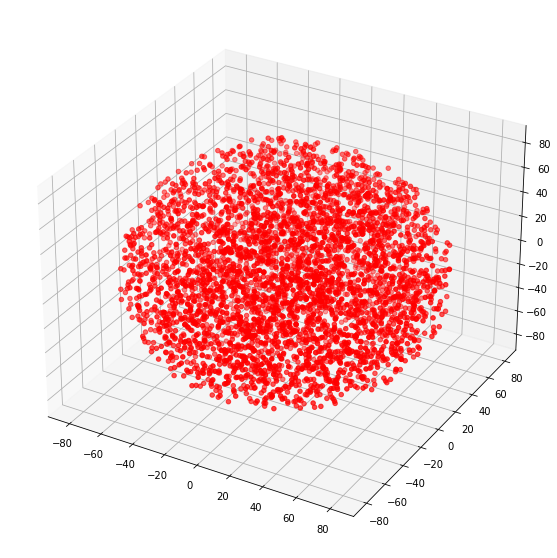

In [33]:
for t in range(num_frames):

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    scat = ax.scatter(x[t*N:(1+t)*N], y[t*N:(1+t)*N], z[t*N:(1+t)*N], c='r', marker='o')

    ax.set_xlim(-90,90)
    ax.set_ylim(-90,90)
    ax.set_zlim(-90,90)
    
    plt.savefig('./images_treecode/fig_t'+str(t)+'.png', dpi=200)
    plt.close()


In [ ]:
import os

# set the directory where your images are stored
directory = "./images_treecode/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)

In [ ]:
import imageio
with imageio.get_writer('./movie.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./images_treecode/'+file)
        writer.append_data(image)
        
files=[]
